<a href="https://colab.research.google.com/github/RationalRhythms/Demographic-Data-Analysis/blob/main/neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_test.shape


(10000, 28, 28)

In [206]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

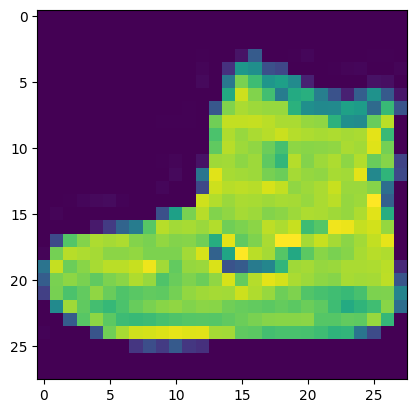

In [207]:
import matplotlib.pyplot as plt

X_train[0]
plt.imshow(X_train[0])

n[$A_0$] = 784,                                       
n[$A_1$] = 50,         
n[$A_2$] = 10

$Z_1$ = $w_1$ $A_0$ + $b_1$,           

$A_1$ = Relu($A_0$)

$Z_2$ = $w_2$ $A_1 $ + $b_2$,           

$A_2$ = Softmax($A_1$)


**Back Propagation**

\
\begin{array}{l}
\delta_2 = a_2 - y \\[6pt]
\displaystyle \frac{\partial L}{\partial w_2} = \delta_2^T a_1 \\[6pt]
\displaystyle \frac{\partial L}{\partial b_2} = \delta_2^T \mathbf{1} \\[6pt]
\delta_1 = (\delta_2 w_2) \odot \mathbf{1}_{z_1 > 0} \\[6pt]
\displaystyle \frac{\partial L}{\partial w_1} = \delta_1^T x \\[6pt]
\displaystyle \frac{\partial L}{\partial b_1} = \delta_1^T \mathbf{1}
\end{array}



In [221]:
X_train = X_train.reshape(-1, 784) / 255.0
X_testog = X_test
X_test = X_test.reshape(-1, 784) / 255.0

In [209]:
Y_test[0]

np.uint8(9)

Gradient descent

In [210]:
def update_params (m_c,b_c,md,bd,learning_r):
  m_c=m_c-learning_r*md
  b_c=b_c-learning_r*bd

  return m_c,b_c

In [211]:
def init():
  w1 = np.random.randn(50, 784) * np.sqrt(2 / 784)
  w2 = np.random.randn(10, 50) * np.sqrt(2 / 50)
  b1=np.zeros((50,1))
  b2=np.zeros((10,1))
  return (w1,b1,w2,b2)

In [212]:
def one_hot(y):
  encoded_y = np.zeros((y.size,y.max()+1))
  encoded_y[np.arange(y.size),y] = 1
  return encoded_y

In [213]:
def forward_pass(X,w1,b1,w2,b2):
  #X.shape() = (n,784)
  z1 = np.dot(X, w1.T) + b1.T  #(n,50)
  a1 = np.maximum(0,z1)  #(n,50) Relu

  z2 = np.dot(z1, w2.T) + b2.T    #(n,10)
  a2 = np.exp(z2)/np.sum(np.exp(z2), axis=1, keepdims=True) #(n,10) Softmax

  return z1, a1, z2, a2


def back_pass(z1,a1,z2,a2,w2,x,y,n):
  encoded_y = one_hot(y) #(n,10)
  dz2 = a2 - encoded_y  #(n,10)
  dw2 = 1/n * np.dot(dz2.T,a1) #(10,50)
  db2 = 1/n * np.sum(dz2, axis=0, keepdims=True).T #(10,1)
  dz1 = np.dot(dz2,w2)* (z1>0) #(n,50)
  dw1 = 1/n * np.dot(dz1.T,x) #(50,784)
  db1 = 1/n * np.sum(dz1, axis=0, keepdims=True).T #(50,1)

  return dw1, db1, dw2, db2

def gradient_des(w1, b1, w2, b2,x,y,l_r,n):
    z1, a1, z2, a2 = forward_pass(x,w1,b1,w2,b2)
    dw1, db1, dw2, db2 = back_pass(z1,a1,z2,a2,w2,x,y,n)
    w1, b1 = update_params (w1 ,b1 ,dw1 ,db1 ,l_r)
    w2, b2 = update_params (w2 ,b2 ,dw2 ,db2 ,l_r)

    if((epoch*batch)%50 == 0):
      predictions = get_predictions(a2)
      print(get_accuracy(predictions, y))

    return w1, b1, w2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=1)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size



In [226]:
epochs = 100
num_batches = 10
batch_size = len(X_train) // num_batches  
n= batch_size
l_r= 0.05
w1, b1, w2, b2= init()


for epoch in range(epochs+1):
    shuffled_indices = np.random.permutation(len(X_train))

    X_train = X_train[shuffled_indices]
    Y_train = Y_train[shuffled_indices]

    for batch in range(num_batches):
        print("Iteration: ", epoch, batch,'\n')
        start_idx = (batch) * batch_size
        end_idx = start_idx + batch_size

        batch_data = X_train[start_idx:end_idx]
        batch_op = Y_train[start_idx:end_idx]

        w1, b1, w2, b2 = gradient_des(w1, b1, w2, b2, batch_data, batch_op, l_r, n)

        pass



Iteration:  0 0 

[0 1 0 ... 7 2 7] [0 5 6 ... 6 1 6]
0.04016666666666667
Iteration:  0 1 

[6 3 4 ... 0 7 0] [5 3 4 ... 0 8 1]
0.16516666666666666
Iteration:  0 2 

[0 2 0 ... 7 1 0] [0 4 1 ... 8 7 8]
0.20333333333333334
Iteration:  0 3 

[0 0 2 ... 2 2 4] [3 1 3 ... 6 6 6]
0.236
Iteration:  0 4 

[2 8 9 ... 9 0 0] [4 0 8 ... 7 3 0]
0.2798333333333333
Iteration:  0 5 

[0 7 2 ... 7 0 0] [1 7 4 ... 8 0 6]
0.32
Iteration:  0 6 

[2 9 4 ... 3 0 0] [2 9 4 ... 1 6 0]
0.3541666666666667
Iteration:  0 7 

[0 2 4 ... 2 9 9] [1 2 2 ... 4 5 7]
0.371
Iteration:  0 8 

[9 7 3 ... 1 2 0] [8 9 3 ... 5 6 1]
0.402
Iteration:  0 9 

[1 7 4 ... 0 2 4] [4 7 2 ... 1 2 5]
0.4103333333333333
Iteration:  1 0 

[2 0 0 ... 2 2 8] [2 6 0 ... 4 2 8]
0.42533333333333334
Iteration:  1 1 

Iteration:  1 2 

Iteration:  1 3 

Iteration:  1 4 

Iteration:  1 5 

Iteration:  1 6 

Iteration:  1 7 

Iteration:  1 8 

Iteration:  1 9 

Iteration:  2 0 

[4 4 3 ... 0 6 4] [4 4 3 ... 0 6 4]
0.5863333333333334
Iteration: 

In [215]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

predictions= make_predictions(X_test,w1,b1,w2,b2)
get_accuracy(predictions, Y_test)

[9 2 1 ... 8 1 5] [9 2 1 ... 8 1 5]


np.float64(0.8228)

Actual:  1 Predicted:  1


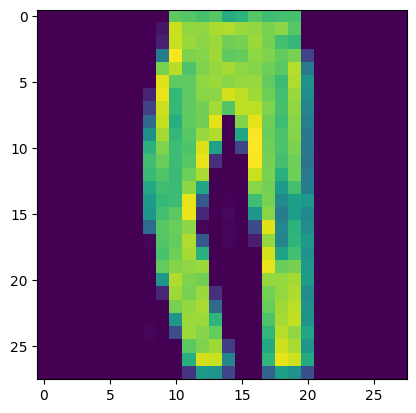

In [224]:
print("Actual: ",Y_test[5], "Predicted: ",predictions[5])
plt.imshow(X_testog[5])